In [4]:
from IPython.display import SVG, display

En este archivo puedes escribir lo que estimes conveniente. Te recomendamos detallar tu solución y todas las suposiciones que estás considerando. Aquí puedes ejecutar las funciones que definiste en los otros archivos de la carpeta src, medir el tiempo, memoria, etc.

In [5]:
file_path = "farmers-protest-tweets-2021-2-4.json"

Para todas las respustas se va a considerar que m es el número de tweets.

### Question 1

Como se menciona anteriormente, $m$ representa el número de tweets y, en este caso, $n$ es la cantidad de fechas únicas.

#### Time

- La manera de enfrentar el problema para hacerlo eficiente en tiempo fue primero crear un diccionario con las fechas y un contador de cuantas veces aparecen en el listado. Esto tiene una complejidad de $O(m)$. En esta parte también se guarda en diccionarios el registro del usuario más activo por fecha.
- Luego se revisa para cada fecha, si el está =entre las más populares o no. Para esto se utilizó la libreria heapq con la que se creó un `min-heap` ya que estos tienen complejidad de $log(x)$ (donde x es el tamaño del heap, 10 en este caso) para insertar y reemplazar y $O(1)$ para obtener el dato menor. 
- La segunda parte de la solución tiene una complejidad de tiempo de $O(nlog(10))$.
- En total, la solución tiene una complejidad de $O(m + nlog10)$ 
- Otra opción que se consideró para la solución fue juntar ambos loops, lo que resultaría en una complejidad de $O(mlog10)$, pero como $m >> n$, esto tomaría mucho más tiempo.

In [3]:
from q1_time import q1_time

q1_time(file_path)

[(datetime.date(2021, 2, 12), 'RanbirS00614606'),
 (datetime.date(2021, 2, 13), 'MaanDee08215437'),
 (datetime.date(2021, 2, 17), 'RaaJVinderkaur'),
 (datetime.date(2021, 2, 16), 'jot__b'),
 (datetime.date(2021, 2, 14), 'rebelpacifist'),
 (datetime.date(2021, 2, 18), 'neetuanjle_nitu'),
 (datetime.date(2021, 2, 15), 'jot__b'),
 (datetime.date(2021, 2, 20), 'MangalJ23056160'),
 (datetime.date(2021, 2, 23), 'Surrypuria'),
 (datetime.date(2021, 2, 19), 'Preetm91')]

Como se puede ver en la siguiente imagen, los tiempos de ejecución de la función está principalmente en `group_by_date`, mientras que `popular_dates` ocupa un porcentaje muy pequeño. Confirmando así que si $m >> n$, conviene la opción elegida antes que hacer todo e un loop.

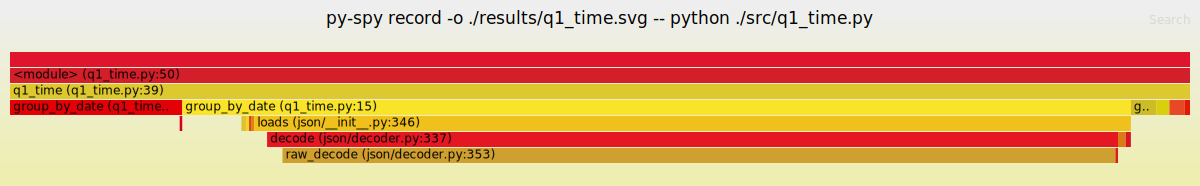

In [4]:
display(SVG(data='../results/q1_time.svg'))

#### Memory
* En el caso del uso de memoria para este problema, la estructura de la solución es parecida en cuanto a las subfunciones, pero cambia el contenido para priorizar la memoria en vez del tiempo. La primera diferencia es que en este caso, en vez de almacenar en formato `datetime.date`, se almacena `str`con la fecha.
* La función `group_by_date` recorre todos los tweets que hay y agrupa en un diccionario de diccionario la cantidad de tweets por usuario por cada día. A diferencia de la solución anterior, solo se crea un diccionario para reducir la memoria usada a cambio del tiempo de más que se va a demorar para calcular el total de tweets por día. 
* En la función `popular_dates` se calcula las 10 fechas más populares en formato de una lista de `str`. Para esto se toman los 10 elementos más grandes segun la cantidad total de tweets (sumando todos los tweets de todos los usuarios por fecha, el trade-off que se comentó previamente). Luego se toman sólo las fechas y no el conteo para hacer uso de menos memoria. 
* La tercera función `popular_users` reocrre cada una de las top 10 fechas y encuentra el usuario con más tweets. Esta retorna una lista de largo 10 de solo `str` con los usernames.
* Finalmente, se retorna una lista con las fehcas en formato `str` y los username en el mismo tipo. 

In [2]:
from q1_memory import q1_memory

q1_memory(file_path)

[('20210212', 'RanbirS00614606'),
 ('20210213', 'MaanDee08215437'),
 ('20210217', 'RaaJVinderkaur'),
 ('20210216', 'jot__b'),
 ('20210214', 'rebelpacifist'),
 ('20210218', 'neetuanjle_nitu'),
 ('20210215', 'jot__b'),
 ('20210220', 'MangalJ23056160'),
 ('20210223', 'Surrypuria'),
 ('20210219', 'Preetm91')]

La imagen de abajo muestra el uso de memora en función del tiempo. También, en el archivo ../results/q1_memory.txt, se tiene el uso de memoria línea por línea.

<div>
<img src="../results/q1_memory.png" width="1000"/>
</div>

### Question 2

#### Time

* La función `q2_time` esta dividida en dos subfunciones, primero se llama a `count_emojis` para hacer el conteo de emojis por tweets y luego a `top_emojis` donde se obtienen los 10 emojis más populares.
* Primero, la función `count_emojis` inicializa un contador y obtiene un patrón regex. Esto último tiene una complejidad $O(r)$ donde $r$ es el largo del patrón, pero en este caso como es constante se considera $O(1)$. Luego se inicia un loop por las lineas de archivo, es decir $m$ veces. En cada loop se buscan los emojis en el contenido del tweet, lo que tiene una complejidad de $O(t)$, donde t es el largo promedio de un tweet (máx. 120 caractéres). Despues se hace un loop por cada emoji encontrado en el tweet, lo que tiene una complejidad de $O(e)$ donde $e$ es la cantidad promedio de emojis por tweet. Es decir, la complejidad de esta función es de $O(m \cdot (t + e))$, pero si consideramos que $t >> e$, entonces la complejidad queda en $O(m\cdot t)$.
* La segunda función `top_emojis` llama al método `most_common(10)` de la clase `Counter`. Este método utiliza min-heap para obtener los valores lo que tiene una complejidad de $O(n log10)$ donde $n$ es la cantidad de emojis. Cómo $log10$ es una constante que no depende de $n$, esta clase tiene una complejidad de $O(n)$.
* Finalmente, la complejidad de la función final es $O(m\cdot t + n)$ y si consideramos que la cantidad de tweets es mucho mayor a la cantidad de emojis ($m >> n$), entonces la complejidad quedaria en $O(m \cdot t)$.

In [3]:
from q2_time import q2_time

q2_time(file_path)

[('🙏', 7286),
 ('😂', 3072),
 ('🚜', 2972),
 ('✊', 2411),
 ('🌾', 2363),
 ('🇮', 2096),
 ('🇳', 2094),
 ('🏻', 2080),
 ('❤', 1779),
 ('🏽', 1218)]

* En la imagen de abajo, se puede ver que la función `count_emojis` toma la mayoría del tiempo de ejecución. Esto confirma la suposición que $m >> n$.
* Parte considerable del tiempo de la función es consumido por `json.loads`, una posible mejora sería implementar una función personalizada para obtener sólo la información relevante (en este caso el contenido del tweet con los emojis). 

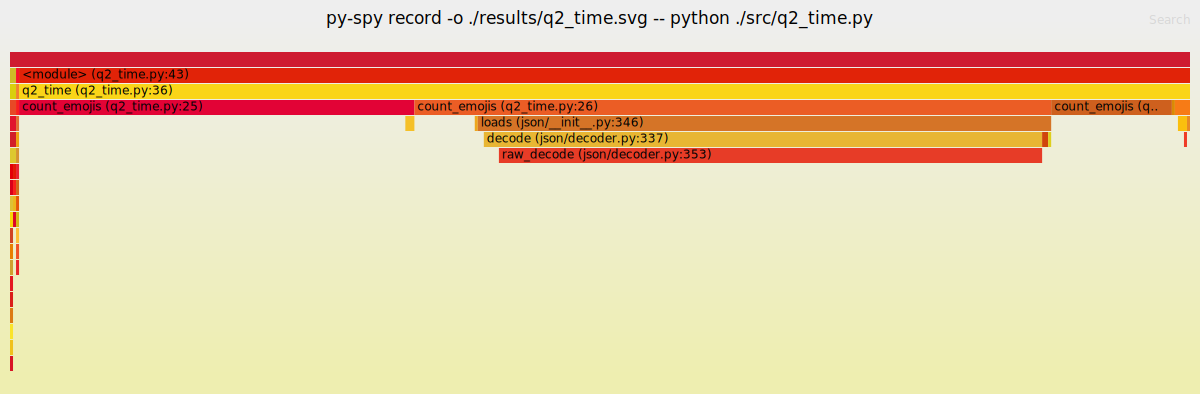

In [4]:
display(SVG(data='../results/q2_time.svg'))

#### Memory

* Al igual que en el caso anterior, para este se dividió la función final en `count_emojis` para obtener el conteo de emojis y `top_emojis` para calcular los emojis más populares. 
* La primera función crea el patrón de regex que se instancia una vez y tiene un uso de memoria constante, es decir $O(1)$. Luego se lee el archivo y se va leyendo línea por línea para hacer más eficiente el uso de memoria y no leer el archivo completo. Al guardar el conteo de emojis en el diccionario se utiliza memoria proporcional a la cantidad de emojis que hayan $O(n)$. 
* La siguiente función utiliza un min-heap para calcular los 10 emojis más populares, esto tiene una complejidad de $O(10)$ que como es una constante se considera $O(1)$. 
* Finalmente, la combinación de ambas funciones tiene una complejidad de memoria de $O(n)$. También, para reducir la memoria usada, se utilizó un diccionario en lugar de un `Counter`, esto ya que si bien ambos tienen la misma complejidad de memoria, el contador es una clase que en la práctica usa más memoria.

In [3]:
from q2_memory import q2_memory

q2_memory(file_path)

[('🙏', 7286),
 ('😂', 3072),
 ('🚜', 2972),
 ('✊', 2411),
 ('🌾', 2363),
 ('🇮', 2096),
 ('🇳', 2094),
 ('🏻', 2080),
 ('❤', 1779),
 ('🏽', 1218)]

La imagen que se ve abajo muestra el uso de memoria del programa. El detalle de la memoria utilizada línea por línea se encuentra en ../results/q2_memory.txt, en este archivo se ve que no hay ningún uso excesivo de memoria para ninguna línea del código, lo que sugiere un uso eficiente de esta.

<div>
<img src="../results/q2_memory.png" width="1000"/>
</div>

### Question 3

#### Time

* Similar a las preguntas anteriores, en este caso la función se separó en dos subfunciones, `user_mentions` para contar las menciones de cada usuario y `top_users` para calcular los 10 usuarios con más menciones.
* Primero, `user_mentions` abre el archivo y recorre línea por línea. Se probó la eficiencia entre leer el arhcivo completo o línea por línea pero lo segundo resultó más eficiente en tiempo ya que el procesamiento se debe hacer igual línea por línea por lo que leerlo completo resulta algo más redundante. La complejidad de ir línea por línea es de $O(m)$ donde $m$ es la cantidad de líneas (tweets). Luego, para cada línea se obtiene la lista de usuarios mencionados, lo que tiene complejidad de $O(1)$, y se recorre la lista para actualizar el contador. Esto último tiene complejidad de $O(l)$ donde $l$ es la cantidad promedio de menciones por tweet. Por tanto, la complejidad total de la función es $O(m\cdot  l)$.
* En segundo lugar, `top_users` utiliza el método de la clase Counter `most_common` la que en sí utiliza un min-heap para calcular los usuarios más mencionados. Este calculo tiene una complejidad de $O(n\cdot log10)$, pero como $log10$ es una constante, la complejidad es de $O(n)$.
* En resúmen, la complejidad total de la solución es de $O(m \cdot l + n)$.

In [6]:
from q3_time import q3_time

q3_time(file_path)

[('narendramodi', 2265),
 ('Kisanektamorcha', 1840),
 ('RakeshTikaitBKU', 1644),
 ('PMOIndia', 1427),
 ('RahulGandhi', 1146),
 ('GretaThunberg', 1048),
 ('RaviSinghKA', 1019),
 ('rihanna', 986),
 ('UNHumanRights', 962),
 ('meenaharris', 926)]

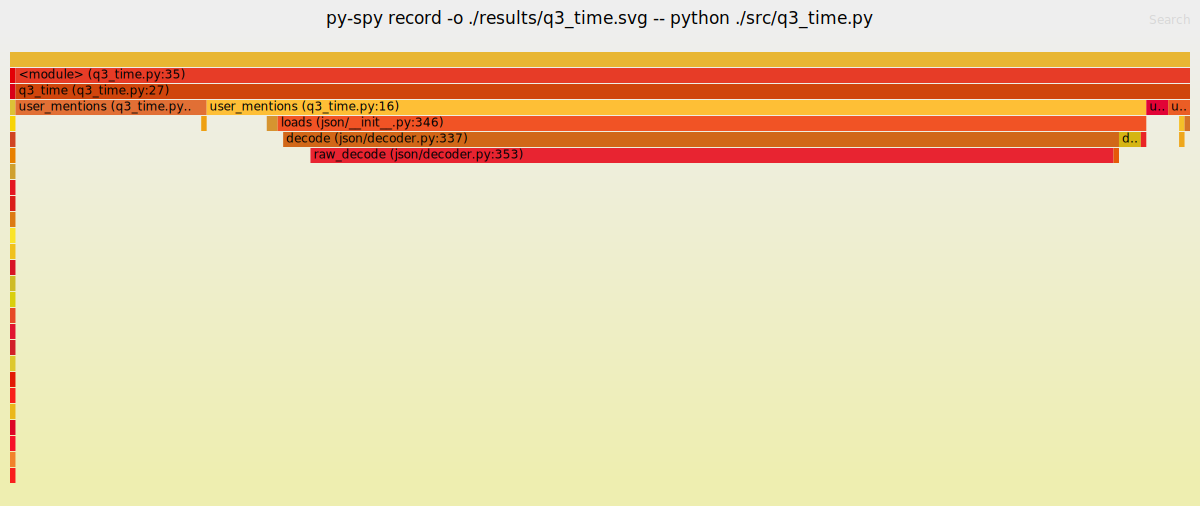

In [7]:
display(SVG(data='../results/q3_time.svg'))